# Comparisions
I want to compare:
1. FAL
2. Threshold FAL
3. Uncertainty sampling
4. Resgral Uncertainty
5. Baseline

In [33]:
import csv
csv.field_size_limit(2000 * 1024 * 1024)

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import ast

In [34]:
baseline_acc = 0.848
baseline_unf = 0.186
baselines_unf = [0.33,0.09,0.37,0.15,0.29,0.01,0.08,0.07,0.02,0.03,0.28,0.25, 0.01]
baselines_acc = [0.8, 0.81,0.79,0.9,0.83,0.96,0.89,0.81,0.94,0.91,0.81,0.77, 1.0]
selected_groups = [5,1,2]
max_sampling = 200

In [35]:
prev= '../../../../snellius/Scripts/adult/FAL/Results/'
dataset = 'Adult'
strategy = 'FAL_total_LG_'
strategy_name = 'Estimation of FAL'

# Create an empty list to store the dictionary entries
data_dict_list = []

types = ['accuracy_histories_profiles', 'accuracy_histories_total', 'fairness_histories_profiles', 'fairness_histories_total']

# types = ['accuracy_histories_total', 'fairness_histories_total']


accuracy_histories_profiles = {}
accuracy_histories_total = {}
fairness_histories_profiles = {}
fairness_histories_total = {}

numbers = [327, 57, 12, 379, 140, 125, 114, 71, 377, 52, 346, 279, 44, 302, 216, 16, 15, 47, 111, 119, 258, 308, 13, 287, 101, 366, 332, 359, 214, 112]
missing_number = [71, 16, 308]
numbers = [number for number in numbers if number not in missing_number]
for typ in types:
    for number in numbers:
        # Open the CSV file for reading
        file = prev + dataset + strategy + str(number) + 'experiments_' + typ + '_13profiles200iter_.csv' 
        
        with open(file, mode='r') as file:
            # Create a CSV reader
            csv_reader = csv.DictReader(file)

            # Iterate over the rows in the CSV file
            for row in csv_reader:
                if typ == 'accuracy_histories_profiles':
#                     print(row)
                    for profile in dict(row):
                        if profile not in accuracy_histories_profiles:
                            accuracy_histories_profiles[profile] = {}
#                         print(row[profile])
                        runs = ast.literal_eval(row[profile])
                        for run_number in runs:
                            if run_number not in accuracy_histories_profiles[profile]:
                                accuracy_histories_profiles[profile][run_number] = []
                            accuracy_histories_profiles[profile][run_number].append(runs[run_number][0])

                if typ == 'accuracy_histories_total':
                    for key in dict(row):
                        if key not in accuracy_histories_total:
                            accuracy_histories_total[key] = []
                        cleaned_string = row[key].strip('[]')
                        float_value = float(cleaned_string)
                        accuracy_histories_total[key].append(float_value)
                        
                if typ == 'fairness_histories_profiles':
                    for profile in dict(row):
                        if profile not in fairness_histories_profiles:
                            fairness_histories_profiles[profile] = {}
#                         print(row[profile])
                        runs = ast.literal_eval(row[profile])
                        for run_number in runs:
                            if run_number not in fairness_histories_profiles[profile]:
                                fairness_histories_profiles[profile][run_number] = []
                            fairness_histories_profiles[profile][run_number].append(runs[run_number][0])

                if typ == 'fairness_histories_total':
#                     print(row)
                    for key in dict(row):
                        if key not in fairness_histories_total:
                            fairness_histories_total[key] = []
                        cleaned_string = row[key].strip('[]')
                        float_value = float(cleaned_string)
                        fairness_histories_total[key].append(float_value)
mean_acc_dict = {}
for key, value in accuracy_histories_total.items():
    mean = np.mean(value)
    mean_acc_dict[key] = mean

mean_unf_dict = {}
for key, value in fairness_histories_total.items():
    mean = np.mean(value)
    mean_unf_dict[key] = mean
    
mean_acc_dict_profiles = {}
for profile, iteration in accuracy_histories_profiles.items():
    mean_acc_dict_profiles[profile] = []
    for iteration in accuracy_histories_profiles[profile]:
        mean_acc_dict_profiles[profile].append(np.mean(accuracy_histories_profiles[profile][iteration]))

mean_unf_dict_profiles = {}
for profile, iteration in fairness_histories_profiles.items():
    mean_unf_dict_profiles[profile] = []
    for iteration in accuracy_histories_profiles[profile]:
        mean_unf_dict_profiles[profile].append(np.mean(fairness_histories_profiles[profile][iteration]))

Fmean_acc_dict = mean_acc_dict
Fmean_unf_dict = mean_unf_dict
Fmean_acc_dict_profiles = mean_acc_dict_profiles
Fmean_unf_dict_profiles = mean_unf_dict_profiles

In [36]:
prev= '../../../../snellius/Scripts/adult/Uncertainty/'
dataset = 'Adult'
strategy = 'Uncertainty'
strategy_name = 'Uncertainty'

# Create an empty list to store the dictionary entries
data_dict_list = []

types = ['accuracy_histories_profiles', 'accuracy_histories_total', 'fairness_histories_profiles', 'fairness_histories_total']

# types = ['accuracy_histories_total', 'fairness_histories_total']


accuracy_histories_profiles = {}
accuracy_histories_total = {}
fairness_histories_profiles = {}
fairness_histories_total = {}

numbers = [327, 57, 12, 379, 140, 125, 114, 71, 377, 52, 346, 279, 44, 302, 216, 16, 15, 47, 111, 119, 258, 308, 13, 287, 101, 366, 332, 359, 214, 112]
missing_number = [71, 16, 308]
numbers = [number for number in numbers if number not in missing_number]
for typ in types:
    for number in numbers:
        # Open the CSV file for reading
        file = prev + dataset + strategy + str(number) + 'experiments_' + typ + '_13profiles1000iter_.csv' 
        
        with open(file, mode='r') as file:
            # Create a CSV reader
            csv_reader = csv.DictReader(file)

            # Iterate over the rows in the CSV file
            for row in csv_reader:
                if typ == 'accuracy_histories_profiles':
#                     print(row)
                    for profile in dict(row):
                        if profile not in accuracy_histories_profiles:
                            accuracy_histories_profiles[profile] = {}
#                         print(row[profile])
                        runs = ast.literal_eval(row[profile])
                        for run_number in runs:
                            if run_number not in accuracy_histories_profiles[profile]:
                                accuracy_histories_profiles[profile][run_number] = []
                            accuracy_histories_profiles[profile][run_number].append(runs[run_number][0])

                if typ == 'accuracy_histories_total':
                    for key in dict(row):
                        if key not in accuracy_histories_total:
                            accuracy_histories_total[key] = []
                        cleaned_string = row[key].strip('[]')
                        float_value = float(cleaned_string)
                        accuracy_histories_total[key].append(float_value)
                        
                if typ == 'fairness_histories_profiles':
                    for profile in dict(row):
                        if profile not in fairness_histories_profiles:
                            fairness_histories_profiles[profile] = {}
#                         print(row[profile])
                        runs = ast.literal_eval(row[profile])
                        for run_number in runs:
                            if run_number not in fairness_histories_profiles[profile]:
                                fairness_histories_profiles[profile][run_number] = []
                            fairness_histories_profiles[profile][run_number].append(runs[run_number][0])

                if typ == 'fairness_histories_total':
#                     print(row)
                    for key in dict(row):
                        if key not in fairness_histories_total:
                            fairness_histories_total[key] = []
                        cleaned_string = row[key].strip('[]')
                        float_value = float(cleaned_string)
                        fairness_histories_total[key].append(float_value)
                        
mean_acc_dict = {}
for key, value in accuracy_histories_total.items():
    mean = np.mean(value)
    mean_acc_dict[key] = mean

mean_unf_dict = {}
for key, value in fairness_histories_total.items():
    mean = np.mean(value)
    mean_unf_dict[key] = mean
    
mean_acc_dict_profiles = {}
for profile, iteration in accuracy_histories_profiles.items():
    mean_acc_dict_profiles[profile] = []
    for iteration in accuracy_histories_profiles[profile]:
        mean_acc_dict_profiles[profile].append(np.mean(accuracy_histories_profiles[profile][iteration]))

mean_unf_dict_profiles = {}
for profile, iteration in fairness_histories_profiles.items():
    mean_unf_dict_profiles[profile] = []
    for iteration in accuracy_histories_profiles[profile]:
        mean_unf_dict_profiles[profile].append(np.mean(fairness_histories_profiles[profile][iteration]))

Umean_acc_dict = mean_acc_dict
Umean_unf_dict = mean_unf_dict
Umean_acc_dict_profiles = mean_acc_dict_profiles
Umean_unf_dict_profiles = mean_unf_dict_profiles

In [37]:
prev= '../../../../snellius/Scripts/adult/Resgral_uncertainty/'
dataset = 'Adult'
strategy = 'ReSGrAL_uncertain'
strategy_name = 'ReSGrAL Uncert.'

# Create an empty list to store the dictionary entries
data_dict_list = []

types = ['accuracy_histories_profiles', 'accuracy_histories_total', 'fairness_histories_profiles', 'fairness_histories_total']

# types = ['accuracy_histories_total', 'fairness_histories_total']


accuracy_histories_profiles = {}
accuracy_histories_total = {}
fairness_histories_profiles = {}
fairness_histories_total = {}

numbers = [327, 57, 12, 379, 140, 125, 114, 71, 377, 52, 346, 279, 44, 302, 216, 16, 15, 47, 111, 119, 258, 308, 13, 287, 101, 366, 332, 359, 214, 112]
missing_number = [71, 16, 308]
numbers = [number for number in numbers if number not in missing_number]
for typ in types:
    for number in numbers:
        # Open the CSV file for reading
        file = prev + dataset + strategy + str(number) + 'experiments_' + typ + '_13profiles1000iter_.csv' 
        
        with open(file, mode='r') as file:
            # Create a CSV reader
            csv_reader = csv.DictReader(file)

            # Iterate over the rows in the CSV file
            for row in csv_reader:
                if typ == 'accuracy_histories_profiles':
#                     print(row)
                    for profile in dict(row):
                        if profile not in accuracy_histories_profiles:
                            accuracy_histories_profiles[profile] = {}
#                         print(row[profile])
                        runs = ast.literal_eval(row[profile])
                        for run_number in runs:
                            if run_number not in accuracy_histories_profiles[profile]:
                                accuracy_histories_profiles[profile][run_number] = []
                            accuracy_histories_profiles[profile][run_number].append(runs[run_number][0])

                if typ == 'accuracy_histories_total':
                    for key in dict(row):
                        if key not in accuracy_histories_total:
                            accuracy_histories_total[key] = []
                        cleaned_string = row[key].strip('[]')
                        float_value = float(cleaned_string)
                        accuracy_histories_total[key].append(float_value)
                        
                if typ == 'fairness_histories_profiles':
                    for profile in dict(row):
                        if profile not in fairness_histories_profiles:
                            fairness_histories_profiles[profile] = {}
#                         print(row[profile])
                        runs = ast.literal_eval(row[profile])
                        for run_number in runs:
                            if run_number not in fairness_histories_profiles[profile]:
                                fairness_histories_profiles[profile][run_number] = []
                            fairness_histories_profiles[profile][run_number].append(runs[run_number][0])

                if typ == 'fairness_histories_total':
#                     print(row)
                    for key in dict(row):
                        if key not in fairness_histories_total:
                            fairness_histories_total[key] = []
                        cleaned_string = row[key].strip('[]')
                        float_value = float(cleaned_string)
                        fairness_histories_total[key].append(float_value)
                        
mean_acc_dict = {}
for key, value in accuracy_histories_total.items():
    mean = np.mean(value)
    mean_acc_dict[key] = mean

mean_unf_dict = {}
for key, value in fairness_histories_total.items():
    mean = np.mean(value)
    mean_unf_dict[key] = mean
    
mean_acc_dict_profiles = {}
for profile, iteration in accuracy_histories_profiles.items():
    mean_acc_dict_profiles[profile] = []
    for iteration in accuracy_histories_profiles[profile]:
        mean_acc_dict_profiles[profile].append(np.mean(accuracy_histories_profiles[profile][iteration]))

mean_unf_dict_profiles = {}
for profile, iteration in fairness_histories_profiles.items():
    mean_unf_dict_profiles[profile] = []
    for iteration in accuracy_histories_profiles[profile]:
        mean_unf_dict_profiles[profile].append(np.mean(fairness_histories_profiles[profile][iteration]))

Rmean_acc_dict = mean_acc_dict
Rmean_unf_dict = mean_unf_dict
Rmean_acc_dict_profiles = mean_acc_dict_profiles
Rmean_unf_dict_profiles = mean_unf_dict_profiles

In [38]:
prev= '../../../../snellius/Scripts/adult/Resgral_uncertainty/'
dataset = 'Adult'
strategy = 'ReSGrAL_uncertain'
strategy_name = 'ReSGrAL Uncert.'

# Create an empty list to store the dictionary entries
data_dict_list = []

types = ['accuracy_histories_profiles', 'accuracy_histories_total', 'fairness_histories_profiles', 'fairness_histories_total']

# types = ['accuracy_histories_total', 'fairness_histories_total']


accuracy_histories_profiles = {}
accuracy_histories_total = {}
fairness_histories_profiles = {}
fairness_histories_total = {}

numbers = [327, 57, 12, 379, 140, 125, 114, 71, 377, 52, 346, 279, 44, 302, 216, 16, 15, 47, 111, 119, 258, 308, 13, 287, 101, 366, 332, 359, 214, 112]
missing_number = [71, 16, 308]
numbers = [number for number in numbers if number not in missing_number]
for typ in types:
    for number in numbers:
        # Open the CSV file for reading
        file = prev + dataset + strategy + str(number) + 'experiments_' + typ + '_13profiles1000iter_.csv' 
        
        with open(file, mode='r') as file:
            # Create a CSV reader
            csv_reader = csv.DictReader(file)

            # Iterate over the rows in the CSV file
            for row in csv_reader:
                if typ == 'accuracy_histories_profiles':
#                     print(row)
                    for profile in dict(row):
                        if profile not in accuracy_histories_profiles:
                            accuracy_histories_profiles[profile] = {}
#                         print(row[profile])
                        runs = ast.literal_eval(row[profile])
                        for run_number in runs:
                            if run_number not in accuracy_histories_profiles[profile]:
                                accuracy_histories_profiles[profile][run_number] = []
                            accuracy_histories_profiles[profile][run_number].append(runs[run_number][0])

                if typ == 'accuracy_histories_total':
                    for key in dict(row):
                        if key not in accuracy_histories_total:
                            accuracy_histories_total[key] = []
                        cleaned_string = row[key].strip('[]')
                        float_value = float(cleaned_string)
                        accuracy_histories_total[key].append(float_value)
                        
                if typ == 'fairness_histories_profiles':
                    for profile in dict(row):
                        if profile not in fairness_histories_profiles:
                            fairness_histories_profiles[profile] = {}
#                         print(row[profile])
                        runs = ast.literal_eval(row[profile])
                        for run_number in runs:
                            if run_number not in fairness_histories_profiles[profile]:
                                fairness_histories_profiles[profile][run_number] = []
                            fairness_histories_profiles[profile][run_number].append(runs[run_number][0])

                if typ == 'fairness_histories_total':
#                     print(row)
                    for key in dict(row):
                        if key not in fairness_histories_total:
                            fairness_histories_total[key] = []
                        cleaned_string = row[key].strip('[]')
                        float_value = float(cleaned_string)
                        fairness_histories_total[key].append(float_value)
                        
mean_acc_dict = {}
for key, value in accuracy_histories_total.items():
    mean = np.mean(value)
    mean_acc_dict[key] = mean

mean_unf_dict = {}
for key, value in fairness_histories_total.items():
    mean = np.mean(value)
    mean_unf_dict[key] = mean
    
mean_acc_dict_profiles = {}
for profile, iteration in accuracy_histories_profiles.items():
    mean_acc_dict_profiles[profile] = []
    for iteration in accuracy_histories_profiles[profile]:
        mean_acc_dict_profiles[profile].append(np.mean(accuracy_histories_profiles[profile][iteration]))

mean_unf_dict_profiles = {}
for profile, iteration in fairness_histories_profiles.items():
    mean_unf_dict_profiles[profile] = []
    for iteration in accuracy_histories_profiles[profile]:
        mean_unf_dict_profiles[profile].append(np.mean(fairness_histories_profiles[profile][iteration]))

Rmean_acc_dict = mean_acc_dict
Rmean_unf_dict = mean_unf_dict
Rmean_acc_dict_profiles = mean_acc_dict_profiles
Rmean_unf_dict_profiles = mean_unf_dict_profiles

In [39]:
prev= '../../../../snellius/Scripts/adult/Threshold_FAL/Results/0.3/'
dataset = 'Adult'
strategy = '0.3T_FAL_total_LG_'
strategy_name = 'Fair ReSGrAL T=0.3'

# Create an empty list to store the dictionary entries
data_dict_list = []

types = ['accuracy_histories_profiles', 'accuracy_histories_total', 'fairness_histories_profiles', 'fairness_histories_total']

# types = ['accuracy_histories_total', 'fairness_histories_total']


accuracy_histories_profiles = {}
accuracy_histories_total = {}
fairness_histories_profiles = {}
fairness_histories_total = {}

numbers = [327, 57, 12, 379, 140, 125, 114, 71, 377, 52, 346, 279, 44, 302, 216, 16, 15, 47, 111, 119, 258, 308, 13, 287, 101, 366, 332, 359, 214, 112]
missing_number = [216, 16]
numbers = [number for number in numbers if number not in missing_number]
for typ in types:
    for number in numbers:
        # Open the CSV file for reading
        file = prev + dataset + strategy + str(number) + 'experiments_' + typ + '_13profiles200iter_.csv' 


        with open(file, mode='r') as file:
            # Create a CSV reader
            csv_reader = csv.DictReader(file)

            # Iterate over the rows in the CSV file
            for row in csv_reader:
                if typ == 'accuracy_histories_profiles':
#                     print(row)
                    for profile in dict(row):
                        if profile not in accuracy_histories_profiles:
                            accuracy_histories_profiles[profile] = {}
#                         print(row[profile])
                        runs = ast.literal_eval(row[profile])
                        for run_number in runs:
                            if run_number not in accuracy_histories_profiles[profile]:
                                accuracy_histories_profiles[profile][run_number] = []
                            accuracy_histories_profiles[profile][run_number].append(runs[run_number][0])

                if typ == 'accuracy_histories_total':
                    for key in dict(row):
                        if key not in accuracy_histories_total:
                            accuracy_histories_total[key] = []
                        cleaned_string = row[key].strip('[]')
                        float_value = float(cleaned_string)
                        accuracy_histories_total[key].append(float_value)
                        
                if typ == 'fairness_histories_profiles':
                    for profile in dict(row):
                        if profile not in fairness_histories_profiles:
                            fairness_histories_profiles[profile] = {}
#                         print(row[profile])
                        runs = ast.literal_eval(row[profile])
                        for run_number in runs:
                            if run_number not in fairness_histories_profiles[profile]:
                                fairness_histories_profiles[profile][run_number] = []
                            fairness_histories_profiles[profile][run_number].append(runs[run_number][0])

                if typ == 'fairness_histories_total':
#                     print(row)
                    for key in dict(row):
                        if key not in fairness_histories_total:
                            fairness_histories_total[key] = []
                        cleaned_string = row[key].strip('[]')
                        float_value = float(cleaned_string)
                        fairness_histories_total[key].append(float_value)
                        
mean_acc_dict = {}
for key, value in accuracy_histories_total.items():
    mean = np.mean(value)
    mean_acc_dict[key] = mean

mean_unf_dict = {}
for key, value in fairness_histories_total.items():
    mean = np.mean(value)
    mean_unf_dict[key] = mean
    
mean_acc_dict_profiles = {}
for profile, iteration in accuracy_histories_profiles.items():
    mean_acc_dict_profiles[profile] = []
    for iteration in accuracy_histories_profiles[profile]:
        mean_acc_dict_profiles[profile].append(np.mean(accuracy_histories_profiles[profile][iteration]))

mean_unf_dict_profiles = {}
for profile, iteration in fairness_histories_profiles.items():
    mean_unf_dict_profiles[profile] = []
    for iteration in accuracy_histories_profiles[profile]:
        mean_unf_dict_profiles[profile].append(np.mean(fairness_histories_profiles[profile][iteration]))

Tmean_acc_dict = mean_acc_dict
Tmean_unf_dict = mean_unf_dict
Tmean_acc_dict_profiles = mean_acc_dict_profiles
Tmean_unf_dict_profiles = mean_unf_dict_profiles

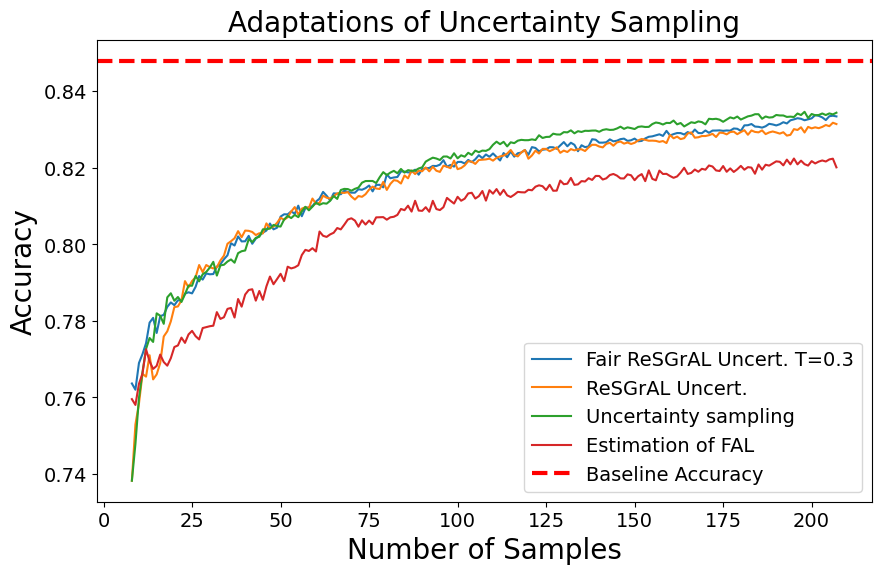

In [49]:
import matplotlib.pyplot as plt

# Extract keys and values
keys = [i for i in range (8, 208)]
values1 = list(Tmean_acc_dict.values())
values2 = list(Rmean_acc_dict.values())
values3 = list(Umean_acc_dict.values())
values4 = list(Fmean_acc_dict.values())

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot values from all dictionaries
ax.plot(keys, values1[:max_sampling], label='Fair ReSGrAL Uncert. T=0.3')
ax.plot(keys, values2[:max_sampling], label='ReSGrAL Uncert.')
ax.plot(keys, values3[:max_sampling], label='Uncertainty sampling')
ax.plot(keys, values4[:max_sampling], label='Estimation of FAL')
ax.axhline(y=baseline_acc, linestyle='--', color='r', linewidth=3, label='Baseline Accuracy')  # Dotted red line


# Add labels and legend
ax.set_xlabel('Number of Samples', fontsize=20)
ax.set_ylabel('Accuracy', fontsize=20)
ax.set_title('Adaptations of Uncertainty Sampling', fontsize=20)
ax.legend(loc = 'lower right', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Rotate x-axis labels for better readability
# plt.xticks(rotation=45)

# Show the plot
plt.show()


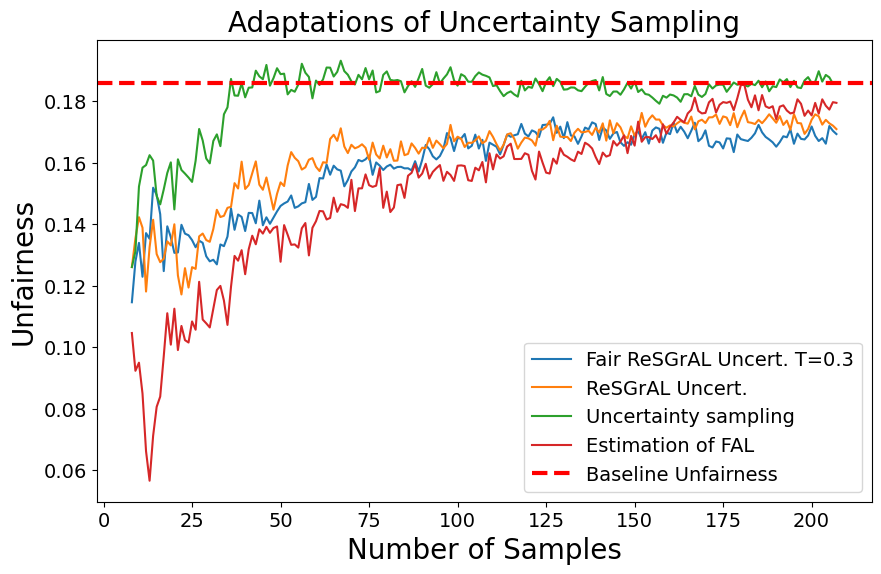

In [48]:
import matplotlib.pyplot as plt

# Extract keys and values
keys = [i for i in range (8, 208)]
values1 = list(Tmean_unf_dict.values())
values2 = list(Rmean_unf_dict.values())
values3 = list(Umean_unf_dict.values())
values4 = list(Fmean_unf_dict.values())

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot values from all dictionaries
ax.plot(keys, values1[:max_sampling], label='Fair ReSGrAL Uncert. T=0.3')
ax.plot(keys, values2[:max_sampling], label='ReSGrAL Uncert.')
ax.plot(keys, values3[:max_sampling], label='Uncertainty sampling')
ax.plot(keys, values4[:max_sampling], label='Estimation of FAL')
ax.axhline(y=baseline_unf, linestyle='--', color='r', linewidth=3, label='Baseline Unfairness')  # Dotted red line


# Add labels and legend
ax.set_xlabel('Number of Samples', fontsize=20)
ax.set_ylabel('Unfairness', fontsize=20)
ax.set_title('Adaptations of Uncertainty Sampling', fontsize=20)
ax.legend(loc = 'lower right', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Rotate x-axis labels for better readability
# plt.xticks(rotation=45)

# Show the plot
plt.show()
